<a href="https://colab.research.google.com/github/joaquinvaras/lab_0_OOP_202110/blob/main/Ejemplo_creacion_BD_postgresql.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Crear BD

Vamos a crear una base de datos en nuestro ambiente de Colab, de modo que luego podamos hacer las consultas de forma local.

Para crear nuestra base de datos, primero es necesaro instalar postgresql en nuestro ambiente, y commercar el servicio. Después cambiarmos la contraseña del usuario postgres (ponemos **123456**) y creamos una base de datos llamada **db_quizzes**.

In [ ]:
# Instalamos el servidor de postgres
!sudo apt-get -y -qq update
!sudo apt-get -y -qq install postgresql
!sudo service postgresql start

# Definimos un password conocido para el usuario postgres
!sudo -u postgres psql -U postgres -c "ALTER USER postgres PASSWORD '123456';"

# Creamos una base de datos
!sudo -u postgres psql -U postgres -c 'DROP DATABASE IF EXISTS db_quizzes;'
!sudo -u postgres psql -U postgres -c 'CREATE DATABASE db_quizzes;'

debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 10.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletype
dpkg-preconfigure: unable to re-open stdin: 
Selecting previously unselected package cron.
(Reading database ... 160706 files and directories currently installed.)
Preparing to unpack .../0-cron_3.0pl1-128.1ubuntu1_amd64.deb ...
Unpacking cron (3.0pl1-128.1ubuntu1) ...
Selecting previously unselected package logrotate.
Preparing to unpack .../1-logrotate_3.11.0-0.1ubuntu1_amd64.deb ...
Unpacking logrotate (3.11.0-0.1ubuntu1) ...
Selecting previously unselected package netbase.
Preparing to unpack .../2-netbase_5.4_all.deb ...
Unpacking netbase (5.4) ...
Selecting previously unselected pac

# Cargar datos

Procedemos ahora a ejecutar nuestro archivo con las sentencias SQL que crean las tablas y cargan los datos en nuestra nueva base de datos.

Debemos subir el archivo a nuestro entorno de ejecución. Tengan en consideración que cada vez que volvamos a ingresar se creará un entorno nuevo, por lo que debemos **volver a subir el archivo**.

In [ ]:
import psycopg2

# Definimos los parámetros para la conexion
params = {
    "host"      : "localhost",
    "database"  : "db_quizzes",
    "user"      : "postgres",
    "password"  : "123456"
}
# Creamos la conexion y armamos un cursor
conn = psycopg2.connect(**params)
cursor = conn.cursor()

# Ejecutamos el contenido del archivo
cursor.execute(open("/content/bd_quizzes.sql", "r").read())
conn.commit()

# Mostramos las tablas
cursor.execute("""SELECT * FROM pg_catalog.pg_tables 
                  WHERE schemaname != 'pg_catalog' 
                    AND schemaname != 'information_schema'""")
rows = cursor.fetchall()
for r in rows:
  print(r)

cursor.close()
conn.close()

/usr/local/lib/python3.7/dist-packages/psycopg2/__init__.py:144: UserWarning: The psycopg2 wheel package will be renamed from release 2.8; in order to keep installing from binary please use "pip install psycopg2-binary" instead. For details see: <http://initd.org/psycopg/docs/install.html#binary-install-from-pypi>.
  """)


('public', 'question_alternative', 'postgres', None, True, False, True, False)
('public', 'quiz_user_question_grade', 'postgres', None, True, False, True, False)
('public', 'question', 'postgres', None, True, False, True, False)
('public', 'quiz_user_question', 'postgres', None, True, False, True, False)
('public', 'quiz', 'postgres', None, True, False, True, False)
('public', 'quiz_user', 'postgres', None, True, False, True, False)


# Consultas

Podemos ahora trabajar directamente con nuestra base de datos haciendo diferentes consultas y usando código python para procesar los datos, hacer gráficos etc.

Vemos unos ejemplos.

1. Las 10 categorías con más preguntas

In [ ]:
# Definimos los parámetros para la conexion
params = {
    "host"      : "localhost",
    "database"  : "db_quizzes",
    "user"      : "postgres",
    "password"  : "123456"
}
# Creamos la conexion y armamos un cursor
conn = psycopg2.connect(**params)
cursor = conn.cursor()

cursor.execute("""SELECT category, COUNT(*) c FROM question 
                  GROUP BY category 
                  ORDER BY c DESC LIMIT 10""")
rows = cursor.fetchall()
for r in rows:
  print(r)

cursor.close()
conn.close()

('Default', 33)
('Cap06_1_Esfuerzo_interno_Intro', 28)
('Cap05_1_Reticulados_calc', 26)
('Reticulados', 26)
('python 1 - variables', 26)
('python-listas-strings', 25)
('Unidades teoria', 23)
('python 3 - funciones', 22)
('python 2 - if', 22)
('Quiz 5 - Espacios Vectoriales (Alternativas)', 21)


2. Gráfico de la cantidad de respuestas por año

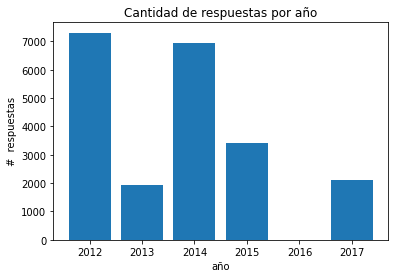

In [ ]:
# Para graficar importamos numpy y matplotlib
import numpy as np
from matplotlib import pyplot

# Definimos los parámetros para la conexion
params = {
    "host"      : "localhost",
    "database"  : "db_quizzes",
    "user"      : "postgres",
    "password"  : "123456"
}
# Creamos la conexion y armamos un cursor
conn = psycopg2.connect(**params)
cursor = conn.cursor()

cursor.execute("""SELECT EXTRACT(YEAR FROM quq.answer_on) y, COUNT(*) c 
                  FROM quiz_user_question quq 
                  WHERE quq.answer_on IS NOT NULL 
                  GROUP BY y ORDER BY y""")
rows = cursor.fetchall()
years = []
counts = []
for r in rows:
  years.append(r[0])
  counts.append(r[1])
pyplot.bar(years, counts)
pyplot.title('Cantidad de respuestas por año')
pyplot.xlabel('año')
pyplot.ylabel('#  respuestas')
pyplot.show()

cursor.close()
conn.close()

3. Gráfico proporción de respuestas correctas por año y categoría (color)

Lo haremos sólo para el curso 1 (Base de datos).

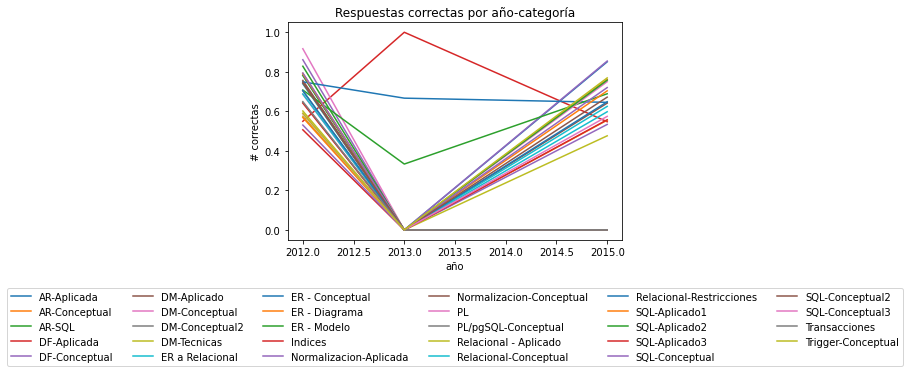

In [ ]:
# Para graficar importamos numpy y matplotlib
import numpy as np
from matplotlib import pyplot

# Definimos los parámetros para la conexion
params = {
    "host"      : "localhost",
    "database"  : "db_quizzes",
    "user"      : "postgres",
    "password"  : "123456"
}
# Creamos la conexion y armamos un cursor
conn = psycopg2.connect(**params)
cursor = conn.cursor()

cursor.execute("""
        WITH por_resultado AS (
          SELECT EXTRACT(YEAR FROM answer_on) y, q.category, qa.is_correct, COUNT(*) c 
          FROM (question q JOIN quiz_user_question quq 
            ON q.id=quq.question) JOIN question_alternative qa
            ON quq.alternative=qa.id
          WHERE q.course=1
          GROUP BY y, q.category, qa.is_correct
        )
        SELECT r1.y y, r1.category, r2.c/SUM(r1.c)
        FROM por_resultado r1, por_resultado r2
        WHERE r1.y=r2.y AND r1.category=r2.category AND r2.is_correct='T'
        GROUP BY r1.y, r1.category, r2.c
        ORDER BY y, category
""")
rows = cursor.fetchall()
fig, ax = pyplot.subplots()

years = []
categories = {}
# obtenemo los años y las categorías
for r in rows:
  if r[0] not in years:
    years.append(r[0])
  if r[1] not in categories:
    categories[r[1]] = []

# por cada año obtenemos el valor de cada categoría y los agregamos al gráfico
for c in categories:
  for y in years:
    y = [r[2] for r in rows if r[0] == y and r[1] == c]
    if len(y) == 0:
      categories[c].append(0)
    else:
      categories[c].append(y[0])
  ax.plot(years, categories[c], label=c)

ax.set_xlabel('año')
ax.set_ylabel('# correctas')
ax.set_title('Respuestas correctas por año-categoría')
ax.legend(loc='center', bbox_to_anchor=(0.5, -0.4), ncol=6)
pyplot.show()

cursor.close()
conn.close()